In [1]:
# Import libraries
import numpy as np
import pandas as pd

# To display all the columns
pd.options.display.max_columns = None

# Set Precision to 18 for better readability
pd.set_option('precision',18)

In [2]:
            # Checkpoint 1: Data Cleaning 1

# Reading file data and storing them in dataframes
companies = pd.read_csv('companies.txt', sep = '\t', encoding = 'iso-8859-1')
rounds2 = pd.read_csv('rounds2.csv', encoding = 'iso-8859-1')
 
    # TABLE 1.1

# 1. Unique Companies in rounds2 dataframe
rounds2_unq_comp = len(rounds2['company_permalink'].str.upper().unique())
print("\nUnique Companies in rounds2 dataframe =", rounds2_unq_comp)

# 2. Unique Companies in companies dataframe
companies_unique_companies = len(companies['permalink'].str.upper().unique())
print("\nUnique Companies in companies =", companies_unique_companies)

# 3. In the companies data frame, which column can be used as the  unique key for each company? 
#    Write the name of the column.

# Answer = companies.company_permalink

# 4. Are there any companies in the rounds2 file which are not  present in companies ? Answer Y/N.
if rounds2_unq_comp > companies_unique_companies:
    print("\nYes, there are {} companies in the rounds2 file which are not present in companies.".format(rounds2_unq_comp - companies_unique_companies))
else:
    print("\nNo, there are no companies in the rounds2 file which are not present in companies.")

# 5. Merging dataframe companies and rounds2
master_frame = pd.merge(companies, rounds2, left_on = companies.permalink.str.upper(), right_on = rounds2.company_permalink.str.upper(), how = 'inner')
# Filling Nan Values of column "raised_amount_usd" to zero
master_frame['raised_amount_usd'].fillna(0, inplace = True)
# Total observations of dataframe master_frame
print("\nTotal Observations in master_frame =", len(master_frame))


Unique Companies in rounds2 dataframe = 66370

Unique Companies in companies = 66368

Yes, there are 2 companies in the rounds2 file which are not present in companies.

Total Observations in master_frame = 114942


In [3]:
        # Checkpoint 2: Investment/Funding Type Analysis

    # TABLE 2.1

# 1. Average funding amount of venture type
print("\nAverage funding amount of venture type =", master_frame[master_frame.funding_round_type == 'venture'].raised_amount_usd.mean())

# 2. Average funding amount of angel type
print("\nAverage funding amount of angel type =", master_frame[master_frame.funding_round_type == 'angel'].raised_amount_usd.mean())

# 3. Average funding amount of seed type
print("\nAverage funding amount of seed type =", master_frame[master_frame.funding_round_type == 'seed'].raised_amount_usd.mean())

# 4. Average funding amount of private equity type
print("\nAverage funding amount of private equity type =", master_frame[master_frame.funding_round_type == 'private_equity'].raised_amount_usd.mean())

# 5. Considering that Spark Funds wants to invest between 5 to 15 million USD per  investment round, which investment type is the most suitable for them?
s = pd.DataFrame(master_frame.groupby('funding_round_type').raised_amount_usd.mean().loc[['venture','angel','seed','private_equity']])
print("\nMost suitable investment type is", s[(s.raised_amount_usd >= 5000000) & (s.raised_amount_usd <= 15000000)].index[0])


Average funding amount of venture type = 10634246.064837007

Average funding amount of angel type = 764564.3457499179

Average funding amount of seed type = 556662.9070057016

Average funding amount of private equity type = 62111788.2297593

Most suitable investment type is venture


In [4]:
        # Checkpoint 3: Country Analysis

    # TABLE 3.1

# Top nine countries which have received the highest total funding (across ALL sectors for the chosen investment type)
top9 = master_frame[(master_frame.funding_round_type == 'venture')].pivot_table(values = 'raised_amount_usd', index = 'country_code', aggfunc = sum).sort_values(by = 'raised_amount_usd', ascending = False).head(9)
print(top9)

# From the list, it can be said as top english speaking countries are:

#    1. USA
#    2. GBR
#    3. IND

print("\n1st English speaking country =",top9.index[0])
print("\n2nd English speaking country =",top9.index[2])
print("\n3rd English speaking country =",top9.index[3])

              raised_amount_usd
country_code                   
USA              422510842796.0
CHN               39835418773.0
GBR               20245627416.0
IND               14391858718.0
CAN                9583332317.0
FRA                7259536732.0
ISR                6907514579.0
DEU                6346959822.0
JPN                3363676611.0

1st English speaking country = USA

2nd English speaking country = GBR

3rd English speaking country = IND


In [5]:
        # Checkpoint 4: Sector Analysis 1

# Reading mapping.csv file
mapping = pd.read_csv('mapping.csv', encoding = 'iso-8859-1')

''' After analyzing both dataframes "master_frame" and "mapping", found that there are some data in mapping dataframe
    where the column category_list has values like "A0lytics", "Veteri0ry", etc and master_frame dataframe has 
    corresponding primary_sector value as "Analytics", "veterinary", etc. While merging the dataframes, data will get
    lost. So changing 0 to na in mapping data frame. '''

mapping['category_list'] = mapping.category_list.str.replace('0', 'na')

''' Deriving a dataframe as "mapping_main_sector_df" that will derive main_sector values, that is column name
    whose value is 1 for its corresponding category_list '''

main_sector_df = pd.melt(mapping, id_vars = 'category_list', var_name = 'main_sector', value_name = 'main_sector_value')
main_sector_df = main_sector_df[main_sector_df.main_sector_value == 1]

# Merging mapping dataframe with main_sector_df dataframe
mapping = pd.merge(mapping, main_sector_df, on = 'category_list', how = 'inner')
# Dropping column main_sector_value as it is no more required
mapping.drop('main_sector_value', axis = 1, inplace = True)

# Adding a new column as "Primary Sector" in the master_frame dataframe
master_frame['primary sector'] = master_frame.category_list.str.split('|').str[0]

# Merging master_frame and mapping dataframes
merged_df = pd.merge(master_frame, mapping, left_on = 'primary sector', right_on = 'category_list', how = 'inner')

merged_df

,key_0,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary sector,category_list_y,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising",main_sector
0,/ORGANIZATION/-FAME,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,Media,Media,0,0,0,1,0,0,0,0,0,Entertainment
1,/ORGANIZATION/90MIN,/Organization/90Min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15000000.0,Media,Media,0,0,0,1,0,0,0,0,0,Entertainment
2,/ORGANIZATION/90MIN,/Organization/90Min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,/ORGANIZATION/90MIN,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5800000.0,Media,Media,0,0,0,1,0,0,0,0,0,Entertainment
3,/ORGANIZATION/90MIN,/Organization/90Min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,/organization/90min,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,NaN,26-03-2014,18000000.0,Media,Media,0,0,0,1,0,0,0,0,0,Entertainment
4,/ORGANIZATION/A-B-PRODUCTIONS,/Organization/A-B-Productions,A.B Productions,NaN,Media|Music|News,operating,USA,CA,Los Angeles,Los Angeles,11-12-2012,/organization/a-b-productions,/funding-round/23bab180ab73f0dcc3f555bebdf89ade,debt_financing,NaN,21-01-2014,0.0,Media,Media,0,0,0,1,0,0,0,0,0,Entertainment
5,/ORGANIZATION/A-DANCE-FOR-ME,/Organization/A-Dance-For-Me,A Dance for Me,http://www.adanceforme.com/,Media|News|Photo Sharing|Video,operating,USA,MT,Missoula,Missoula,31-07-2011,/ORGANIZATION/A-DANCE-FOR-ME,/funding-round/9ab9dbd17bf010c79d8415b2c22be6fa,equity_crowdfunding,NaN,26-03-2014,1090000.0,Media,Media,0,0,0,1,0,0,0,0,0,Entertainment
6,/ORGANIZATION/ACE-FILM-PRODUCTIONS,/Organization/Ace-Film-Productions,ACE Film Productions,NaN,Media|News,operating,USA,NJ,Newark,Newark,01-06-2011,/organization/ace-film-productions,/funding-round/c855cb74f332d72871901e140821509e,equity_crowdfunding,NaN,23-01-2012,0.0,Media,Media,0,0,0,1,0,0,0,0,0,Entertainment
7,/ORGANIZATION/ACTION-AUDIO-APPS,/Organization/Action-Audio-Apps,Action Audio Apps,http://actionaudioapps.net/,Media|News,operating,USA,NY,NY - Other,Pleasantville,12-06-2012,/organization/action-audio-apps,/funding-round/1c944693d17e52a50157cf5aa4c13687,equity_crowdfunding,NaN,27-02-2015,0.0,Media,Media,0,0,0,1,0,0,0,0,0,Entertainment
8,/ORGANIZATION/AKIRA-MOBILE,/Organization/Akira-Mobile,Akira Mobile,http://www.akira.lt/en,Media|Mobile|SMS|Telecommunications,operating,LTU,NaN,NaN,NaN,NaN,/ORGANIZATION/AKIRA-MOBILE,/funding-round/bfb170aea580e381e5b1810c87855c9e,seed,NaN,01-08-2012,18410.0,Media,Media,0,0,0,1,0,0,0,0,0,Entertainment
9,/ORGANIZATION/ALL-DAY-MEDIA,/Organization/All-Day-Media,ALL DAY MEDIA,http://allday.com/,Media|Social Media,operating,USA,CA,Los Angeles,Los Angeles,01-01-2013,/ORGANIZATION/ALL-DAY-MEDIA,/funding-round/2760c0426a124b84c540bd4fd2dfe6e5,seed,NaN,16-12-2014,2000000.0,Media,Media,0,0,0,1,0,0,0,0,0,Entertainment


In [6]:
        # Checkpoint 5: Sector Analysis 2

# Dataframe for country = USA
D1 = merged_df[ (merged_df.country_code == 'USA') & 
                (merged_df.funding_round_type == 'venture') & 
                (merged_df.raised_amount_usd >= 5000000) &
                (merged_df.raised_amount_usd <= 15000000)
              ]

# Get the total count of main_sector and total raised_amount_usd for each main_sector and store it in a new dataframe
D1_df = D1.groupby('main_sector').agg({'main_sector':'count',
                                       'raised_amount_usd':'sum'
                                      })

# Merging the the above two dataframes. Using the index from the right DataFrame as the join key.
D1 = pd.merge(D1, D1_df, left_on = 'main_sector', right_index = True, how = 'inner')

# Cosmetic Change: Drop ambiguous coulmn and Rename the columns to a different name for better readability
D1.drop('main_sector', axis = 1, inplace = True)

D1.rename(columns = {'raised_amount_usd_x': 'raised_amount_usd',
                     'main_sector_x': 'main_sector',
                     'main_sector_y': 'total_investment_count',
                     'raised_amount_usd_y': 'total_investment_amount'
                    }, inplace = True)

D1

,key_0,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary sector,category_list_y,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising",main_sector,total_investment_count,total_investment_amount
10,/ORGANIZATION/ALL-DEF-DIGITAL,/Organization/All-Def-Digital,All Def Digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,NaN,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5000000.0,Media,Media,0,0,0,1,0,0,0,0,0,Entertainment,591,5099197982.0
43,/ORGANIZATION/CHEFS-FEED,/Organization/Chefs-Feed,ChefsFeed,http://www.chefsfeed.com,Media|Mobile|Restaurants|Technology,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012,/ORGANIZATION/CHEFS-FEED,/funding-round/adca195749ae9ace84684723fbe75e5b,venture,A,26-02-2015,5000000.0,Media,Media,0,0,0,1,0,0,0,0,0,Entertainment,591,5099197982.0
98,/ORGANIZATION/HUFFINGTONPOST,/Organization/Huffingtonpost,The Huffington Post,http://www.huffingtonpost.com,Media|News|Publishing,acquired,USA,NY,New York City,New York,09-05-2005,/ORGANIZATION/HUFFINGTONPOST,/funding-round/7f05940c4d2dfecb8e50a0e5720e5065,venture,A,01-08-2006,5000000.0,Media,Media,0,0,0,1,0,0,0,0,0,Entertainment,591,5099197982.0
99,/ORGANIZATION/HUFFINGTONPOST,/Organization/Huffingtonpost,The Huffington Post,http://www.huffingtonpost.com,Media|News|Publishing,acquired,USA,NY,New York City,New York,09-05-2005,/organization/huffingtonpost,/funding-round/9241ae16e08df17ebdc064e49e23035a,venture,B,01-09-2007,5000000.0,Media,Media,0,0,0,1,0,0,0,0,0,Entertainment,591,5099197982.0
134,/ORGANIZATION/MATCHMINE,/Organization/Matchmine,MatchMine,http://matchmine.com,Media|News|Reviews and Recommendations,closed,USA,MA,Boston,Needham,01-01-2007,/ORGANIZATION/MATCHMINE,/funding-round/41ac526630da57ad6eb9d02431b17657,venture,A,01-09-2007,10000000.0,Media,Media,0,0,0,1,0,0,0,0,0,Entertainment,591,5099197982.0
138,/ORGANIZATION/MEDIABONG,/Organization/Mediabong,MEDIABONG,http://www.mediabong.com,Media|Semantic Search|Video,operating,USA,NY,New York City,New York,30-05-2011,/organization/mediabong,/funding-round/9282890ca87072025dc1807f400acee6,venture,B,13-05-2015,5000000.0,Media,Media,0,0,0,1,0,0,0,0,0,Entertainment,591,5099197982.0
156,/ORGANIZATION/NEWSCORPORATION,/Organization/Newscorporation,News Corp,http://www.newscorp.com,Media|News|Publishing,ipo,USA,NY,New York City,New York,01-01-2013,/organization/newscorporation,/funding-round/8f6d7c4592e43e91e8688ba342bffcb7,venture,NaN,08-01-2010,12500000.0,Media,Media,0,0,0,1,0,0,0,0,0,Entertainment,591,5099197982.0
162,/ORGANIZATION/NOKEENA,/Organization/Nokeena,Ankeena Networks,http://www.ankeena.com,Media|Software,acquired,USA,CA,SF Bay Area,Santa Clara,01-01-2008,/ORGANIZATION/NOKEENA,/funding-round/9225f2db6b1b74892d5de6a8744b94ea,venture,A,08-08-2008,9400000.0,Media,Media,0,0,0,1,0,0,0,0,0,Entertainment,591,5099197982.0
164,/ORGANIZATION/NOKEENA,/Organization/Nokeena,Ankeena Networks,http://www.ankeena.com,Media|Software,acquired,USA,CA,SF Bay Area,Santa Clara,01-01-2008,/ORGANIZATION/NOKEENA,/funding-round/fb7a617ed6d1a3203024f0f111417bfb,venture,B,25-06-2009,6500000.0,Media,Media,0,0,0,1,0,0,0,0,0,Entertainment,591,5099197982.0
183,/ORGANIZATION/PLUMTV,/Organization/Plumtv,PlumTV,http://www.plumtv.com,Media|Television|Web Hosting,closed,USA,NY,New York City,New York,01-01-2002,/ORGANIZATION/PLUMTV,/funding-round/e5109c28c1b4899b068cfa552850c424,venture,B,01-09-2009,5200000.0,Media,Media,0,0,0,1,0,0,0,0,0,Entertainment,591,5099197982.0


In [7]:
        # Checkpoint 5: Sector Analysis 2

# Dataframe for country = GBR
D2 = merged_df[ (merged_df.country_code == 'GBR') & 
                (merged_df.funding_round_type == 'venture') & 
                (merged_df.raised_amount_usd >= 5000000) &
                (merged_df.raised_amount_usd <= 15000000)
              ]

# Get the total count of main_sector and total raised_amount_usd for each main_sector and store it in a new dataframe
D2_df = D2.groupby('main_sector').agg({'main_sector':'count',
                                       'raised_amount_usd':'sum'
                                      })

# Merging the the above two dataframes. Using the index from the right DataFrame as the join key.
D2 = pd.merge(D2, D2_df, left_on = 'main_sector', right_index = True, how = 'inner')

# Cosmetic Change: Drop ambiguous coulmn and Rename the columns to a different name for better readability
D2.drop('main_sector', axis = 1, inplace = True)

D2.rename(columns = {'raised_amount_usd_x': 'raised_amount_usd',
                     'main_sector_x': 'main_sector',
                     'main_sector_y': 'total_investment_count',
                     'raised_amount_usd_y': 'total_investment_amount'
                    }, inplace = True)

D2

,key_0,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary sector,category_list_y,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising",main_sector,total_investment_count,total_investment_amount
1,/ORGANIZATION/90MIN,/Organization/90Min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15000000.0,Media,Media,0,0,0,1,0,0,0,0,0,Entertainment,56,482784687.0
2,/ORGANIZATION/90MIN,/Organization/90Min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,/ORGANIZATION/90MIN,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5800000.0,Media,Media,0,0,0,1,0,0,0,0,0,Entertainment,56,482784687.0
14010,/ORGANIZATION/EUTECHNYX,/Organization/Eutechnyx,Eutechnyx,http://press.eutechnyx.com,Games,operating,GBR,E5,Gateshead,Gateshead,01-01-1987,/ORGANIZATION/EUTECHNYX,/funding-round/d2fc787fbc5e4f468dff8b2c557993f1,venture,A,13-05-2010,8800000.0,Games,Games,0,0,0,1,0,0,0,0,0,Entertainment,56,482784687.0
14638,/ORGANIZATION/MIND-CANDY,/Organization/Mind-Candy,Mind Candy,http://www.mindcandy.com,Games,operating,GBR,H9,London,London,01-01-2003,/organization/mind-candy,/funding-round/47df01ed44d7b5916159051e5e32391e,venture,B,01-06-2011,10000000.0,Games,Games,0,0,0,1,0,0,0,0,0,Entertainment,56,482784687.0
14639,/ORGANIZATION/MIND-CANDY,/Organization/Mind-Candy,Mind Candy,http://www.mindcandy.com,Games,operating,GBR,H9,London,London,01-01-2003,/ORGANIZATION/MIND-CANDY,/funding-round/c6a873b4cbdd7ea3d023a771bd3b2f99,venture,A,23-11-2006,10860000.0,Games,Games,0,0,0,1,0,0,0,0,0,Entertainment,56,482784687.0
14662,/ORGANIZATION/MOBANGO,/Organization/Mobango,Mobango,http://www.mobango.com,Games,operating,GBR,H9,London,London,01-01-2006,/ORGANIZATION/MOBANGO,/funding-round/a5c15d027c10bdd8b024823722940b9a,venture,B,31-03-2008,5700000.0,Games,Games,0,0,0,1,0,0,0,0,0,Entertainment,56,482784687.0
14748,/ORGANIZATION/NATURALMOTION,/Organization/Naturalmotion,NaturalMotion,http://naturalmotion.com,Games|Graphics,acquired,GBR,K2,London,Oxford,01-01-2001,/ORGANIZATION/NATURALMOTION,/funding-round/c228343f250a8e67272fd6bf38fd67c3,venture,B,21-06-2012,11000000.0,Games,Games,0,0,0,1,0,0,0,0,0,Entertainment,56,482784687.0
14837,/ORGANIZATION/OUTPLAY-ENTERTAINMENT,/Organization/Outplay-Entertainment,Outplay Entertainment,http://outplay.com/,Games|Mobile|Mobile Games|Social Games|Social ...,operating,GBR,U3,Dundee,Dundee,01-01-2010,/ORGANIZATION/OUTPLAY-ENTERTAINMENT,/funding-round/a4a704f394f2834cdfef60e2a5d4985b,venture,NaN,28-05-2014,5000000.0,Games,Games,0,0,0,1,0,0,0,0,0,Entertainment,56,482784687.0
14891,/ORGANIZATION/PLAYCAST-MEDIA,/Organization/Playcast-Media,Playcast Media,http://playcast-media.com,Games,operating,GBR,H9,London,London,01-01-2007,/organization/playcast-media,/funding-round/3d4affd163bf57dc9a210141db8751c5,venture,B,25-01-2011,10000000.0,Games,Games,0,0,0,1,0,0,0,0,0,Entertainment,56,482784687.0
14903,/ORGANIZATION/PLAYER-X,/Organization/Player-X,Player X,http://www.playerx.com,Games,operating,GBR,H9,London,London,01-01-2003,/organization/player-x,/funding-round/2e87ffe1b5abbdddf8c1951ffbb5b7bc,venture,B,18-01-2007,9850000.0,Games,Games,0,0,0,1,0,0,0,0,0,Entertainment,56,482784687.0


In [8]:
        # Checkpoint 5: Sector Analysis 2

# Dataframe for country = IND
D3 = merged_df[ (merged_df.country_code == 'IND') & 
                (merged_df.funding_round_type == 'venture') & 
                (merged_df.raised_amount_usd >= 5000000) &
                (merged_df.raised_amount_usd <= 15000000)
              ]

# Get the total count of main_sector and total raised_amount_usd for each main_sector and store it in a new dataframe
D3_df = D3.groupby('main_sector').agg({'main_sector':'count',
                                       'raised_amount_usd':'sum'
                                      })

# Merging the the above two dataframes. Using the index from the right DataFrame as the join key.
D3 = pd.merge(D3, D3_df, left_on = 'main_sector', right_index = True, how = 'inner')

# Cosmetic Change: Drop ambiguous coulmn and Rename the columns to a different name for better readability
D3.drop('main_sector', axis = 1, inplace = True)

D3.rename(columns = {'raised_amount_usd_x': 'raised_amount_usd',
                     'main_sector_x': 'main_sector',
                     'main_sector_y': 'total_investment_count',
                     'raised_amount_usd_y': 'total_investment_amount'
                    }, inplace = True)

D3

,key_0,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary sector,category_list_y,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising",main_sector,total_investment_count,total_investment_amount
0,/ORGANIZATION/-FAME,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,Media,Media,0,0,0,1,0,0,0,0,0,Entertainment,33,280830000.0
13918,/ORGANIZATION/DHRUVA,/Organization/Dhruva,Dhruva,http://www.dhruva.com/,Games,operating,IND,19,Bangalore,Bangalore,01-01-1997,/ORGANIZATION/DHRUVA,/funding-round/6035248811c9530b11bd442d9239a0b1,venture,NaN,27-11-2006,5000000.0,Games,Games,0,0,0,1,0,0,0,0,0,Entertainment,33,280830000.0
14185,/ORGANIZATION/GAMES2WIN,/Organization/Games2Win,Games2Win,http://www.games2win.com,Games,operating,IND,16,Mumbai,Mumbai,01-01-2005,/organization/games2win,/funding-round/6b024f4906c288c66d1df966e6aeb256,venture,A,29-03-2007,5000000.0,Games,Games,0,0,0,1,0,0,0,0,0,Entertainment,33,280830000.0
14187,/ORGANIZATION/GAMES2WIN,/Organization/Games2Win,Games2Win,http://www.games2win.com,Games,operating,IND,16,Mumbai,Mumbai,01-01-2005,/organization/games2win,/funding-round/b095563fd43d1e4fd16da3f4bcd040af,venture,B,30-03-2011,6000000.0,Games,Games,0,0,0,1,0,0,0,0,0,Entertainment,33,280830000.0
14955,/ORGANIZATION/POKKT,/Organization/Pokkt,POKKT,http://www.pokkt.com,Games,operating,IND,16,Mumbai,Mumbai,01-08-2012,/organization/pokkt,/funding-round/adb94c131e001a7438a4695d873d8dc1,venture,B,03-11-2015,5000000.0,Games,Games,0,0,0,1,0,0,0,0,0,Entertainment,33,280830000.0
15306,/ORGANIZATION/TAGGLE-INTERNET-VENTURES-PRIVATE,/Organization/Taggle-Internet-Ventures-Private,Taggle Internet Ventures Private,http://www.taggle.com,Games,closed,IND,19,Bangalore,Bengaluru,01-01-2010,/organization/taggle-internet-ventures-private,/funding-round/e9948bcf99cef341ba917e917bd1ec3d,venture,NaN,23-06-2010,8750000.0,Games,Games,0,0,0,1,0,0,0,0,0,Entertainment,33,280830000.0
37825,/ORGANIZATION/ADLABS-IMAGICA,/Organization/Adlabs-Imagica,Adlabs Imagica,http://www.adlabsimagica.com,Entertainment|Tourism,operating,IND,16,IND - Other,Khopoli,NaN,/ORGANIZATION/ADLABS-IMAGICA,/funding-round/508d3c83daaae9fda3ba6f9682c78f6c,venture,NaN,28-10-2014,8180000.0,Entertainment,Entertainment,0,0,0,1,0,0,0,0,0,Entertainment,33,280830000.0
55515,/ORGANIZATION/COLLECTABILLIA-COM,/Organization/Collectabillia-Com,Collectabillia.com,https://www.collectabillia.com/,Fashion|Sports,operating,IND,19,Bangalore,Bengaluru,01-01-2010,/ORGANIZATION/COLLECTABILLIA-COM,/funding-round/3f8a09e3a1b7115d5f9d87fa712306b2,venture,B,10-07-2015,7500000.0,Fashion,Fashion,0,0,0,1,0,0,0,0,0,Entertainment,33,280830000.0
55516,/ORGANIZATION/COLLECTABILLIA-COM,/Organization/Collectabillia-Com,Collectabillia.com,https://www.collectabillia.com/,Fashion|Sports,operating,IND,19,Bangalore,Bengaluru,01-01-2010,/organization/collectabillia-com,/funding-round/8c84532aaa164d60c613bfedc5173503,venture,B,07-07-2015,7500000.0,Fashion,Fashion,0,0,0,1,0,0,0,0,0,Entertainment,33,280830000.0
55602,/ORGANIZATION/FREECULTR,/Organization/Freecultr,FREECULTR,http://www.freecultr.com,Fashion|Marketplaces|Mens Specific|Textiles|Women,operating,IND,10,Haryana,Haryana,01-01-2011,/ORGANIZATION/FREECULTR,/funding-round/2dbe6a774a5083772ad79e5a21272e6a,venture,B,17-07-2012,9000000.0,Fashion,Fashion,0,0,0,1,0,0,0,0,0,Entertainment,33,280830000.0


In [9]:
    # Table 5.1 : Sector-wise Investment Analysis

# 1. Total number of investments (count)
print("\nTotal number of Investments (count) of D1 = ", D1[D1.main_sector != 'Blanks'].main_sector.count())
print("\nTotal number of Investments (count) of D2 = ", D2[D2.main_sector != 'Blanks'].main_sector.count())
print("\nTotal number of Investments (count) of D3 = ", D3[D3.main_sector != 'Blanks'].main_sector.count())

# 2. Total amount of investment (USD)
print("\nTotal amount of investment (USD) of D1 = ", D1[D1.main_sector != 'Blanks'].raised_amount_usd.sum())
print("\nTotal amount of investment (USD) of D2 = ", D2[D2.main_sector != 'Blanks'].raised_amount_usd.sum())
print("\nTotal amount of investment (USD) of D3 = ", D3[D3.main_sector != 'Blanks'].raised_amount_usd.sum())


Total number of Investments (count) of D1 =  12012

Total number of Investments (count) of D2 =  619

Total number of Investments (count) of D3 =  328

Total amount of investment (USD) of D1 =  107318294664.0

Total amount of investment (USD) of D2 =  5365228300.0

Total amount of investment (USD) of D3 =  2949543602.0


In [10]:
# Question: 3, 4, 5, 6, 7, 8, 9 and 10 of country = USD, Dataframe = D1

D1_calc = D1_df.copy(deep = False)

#D1.sort_values

D1_calc.drop('Blanks', inplace = True)

D1_calc.sort_values(by = 'main_sector', axis = 0, ascending = False, inplace = True)

print("\nTop Sector name (no. of investment-wise) in dataframe D1 =",D1_calc.index[0])

print("\nSecond Sector name (no. of investment-wise) in dataframe D1 =",D1_calc.index[1])

print("\nThird Sector name (no. of investment-wise) in dataframe D1 =",D1_calc.index[2])

print("\nNumber of investments in top sector in dataframe D1 =",D1_calc.iloc[0, 0])

print("\nNumber of investments in second sector in dataframe D1 =",D1_calc.iloc[1, 0])

print("\nNumber of investments in third sector in dataframe D1 =",D1_calc.iloc[2, 0])

print("\nSecond Sector name (no. of investment-wise) in dataframe D1 =",D1_calc.index[1])

print("\nThird Sector name (no. of investment-wise) in dataframe D1 =",D1_calc.index[2])

print("\nHighest Investment company in dataframe D1 for Others main_sector =",
      D1[D1.main_sector == 'Others'].groupby(by = 'name').raised_amount_usd.sum().sort_values(ascending = False).index[0])

print("\nHighest Investment company in dataframe D1 Social, Finance, Analytics, Advertising main_sector =",
      D1[D1.main_sector == 'Social, Finance, Analytics, Advertising'].groupby(by = 'name').raised_amount_usd.sum().sort_values(ascending = False).index[0])


Top Sector name (no. of investment-wise) in dataframe D1 = Others

Second Sector name (no. of investment-wise) in dataframe D1 = Social, Finance, Analytics, Advertising

Third Sector name (no. of investment-wise) in dataframe D1 = Cleantech / Semiconductors

Number of investments in top sector in dataframe D1 = 2950

Number of investments in second sector in dataframe D1 = 2714

Number of investments in third sector in dataframe D1 = 2300

Second Sector name (no. of investment-wise) in dataframe D1 = Social, Finance, Analytics, Advertising

Third Sector name (no. of investment-wise) in dataframe D1 = Cleantech / Semiconductors

Highest Investment company in dataframe D1 for Others main_sector = Virtustream

Highest Investment company in dataframe D1 Social, Finance, Analytics, Advertising main_sector = SST Inc. (Formerly ShotSpotter)


/Users/Deb/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: 'main_sector' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  if __name__ == '__main__':


In [11]:
# Question: 3, 4, 5, 6, 7, 8, 9 and 10 of country = GBR, Dataframe = D2

D2_calc = D2_df.copy(deep = False)

D2_calc.drop('Blanks', inplace = True)

D2_calc.sort_values(by = 'main_sector', axis = 0, ascending = False, inplace = True)

print("\nTop Sector name (no. of investment-wise) in dataframe D2 =",D2_calc.index[0])

print("\nSecond Sector name (no. of investment-wise) in dataframe D2 =",D2_calc.index[1])

print("\nThird Sector name (no. of investment-wise) in dataframe D2 =",D2_calc.index[2])

print("\nNumber of investments in top sector in dataframe D2 =",D2_calc.iloc[0, 0])

print("\nNumber of investments in second sector in dataframe D2 =",D2_calc.iloc[1, 0])

print("\nNumber of investments in third sector in dataframe D2 =",D2_calc.iloc[2, 0])

print("\nHighest Investment company in dataframe D2 for Others main_sector =",
      D2[D2.main_sector == 'Others'].groupby(by = 'name').raised_amount_usd.sum().sort_values(ascending = False).index[0])

print("\nHighest Investment company in dataframe D2 for Social, Finance, Analytics, Advertising main_sector =",
      D2[D2.main_sector == 'Social, Finance, Analytics, Advertising'].groupby(by = 'name').raised_amount_usd.sum().sort_values(ascending = False).index[0])


Top Sector name (no. of investment-wise) in dataframe D2 = Others

Second Sector name (no. of investment-wise) in dataframe D2 = Social, Finance, Analytics, Advertising

Third Sector name (no. of investment-wise) in dataframe D2 = Cleantech / Semiconductors

Number of investments in top sector in dataframe D2 = 147

Number of investments in second sector in dataframe D2 = 133

Number of investments in third sector in dataframe D2 = 128

Highest Investment company in dataframe D2 for Others main_sector = Electric Cloud

Highest Investment company in dataframe D2 for Social, Finance, Analytics, Advertising main_sector = Celltick Technologies


/Users/Deb/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: 'main_sector' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  import sys


In [12]:
# Question: 3, 4, 5, 6, 7, 8, 9 and 10 of country = IND, Dataframe = D3

D3_calc = D3_df.copy(deep = False)

D3_calc.drop('Blanks', inplace = True)

D3_calc.sort_values(by = 'main_sector', axis = 0, ascending = False, inplace = True)

print("\nTop Sector name (no. of investment-wise) in dataframe D3 =",D3_calc.index[0])

print("\nSecond Sector name (no. of investment-wise) in dataframe D3 =",D3_calc.index[1])

print("\nThird Sector name (no. of investment-wise) in dataframe D3 =",D3_calc.index[2])

print("\nNumber of investments in top sector in dataframe D3 =",D3_calc.iloc[0, 0])

print("\nNumber of investments in second sector in dataframe D3 =",D3_calc.iloc[1, 0])

print("\nNumber of investments in third sector in dataframe D3 =",D3_calc.iloc[2, 0])

print("\nHighest Investment company in dataframe D3 for Others main_sector =",D3[D3.main_sector == 'Others'].groupby(by = 'name').raised_amount_usd.sum().sort_values(ascending = False).index[0])

print("\nHighest Investment company in dataframe D3 for Social, Finance, Analytics, Advertising main_sector =",
      D3[D3.main_sector == 'Social, Finance, Analytics, Advertising'].groupby(by = 'name').raised_amount_usd.sum().sort_values(ascending = False).index[0])


Top Sector name (no. of investment-wise) in dataframe D3 = Others

Second Sector name (no. of investment-wise) in dataframe D3 = Social, Finance, Analytics, Advertising

Third Sector name (no. of investment-wise) in dataframe D3 = News, Search and Messaging

Number of investments in top sector in dataframe D3 = 110

Number of investments in second sector in dataframe D3 = 60

Number of investments in third sector in dataframe D3 = 52

Highest Investment company in dataframe D3 for Others main_sector = FirstCry.com

Highest Investment company in dataframe D3 for Social, Finance, Analytics, Advertising main_sector = Manthan Systems


/Users/Deb/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: 'main_sector' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  import sys


In [13]:
        # Checkpoint 6: Plots

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style = "whitegrid")

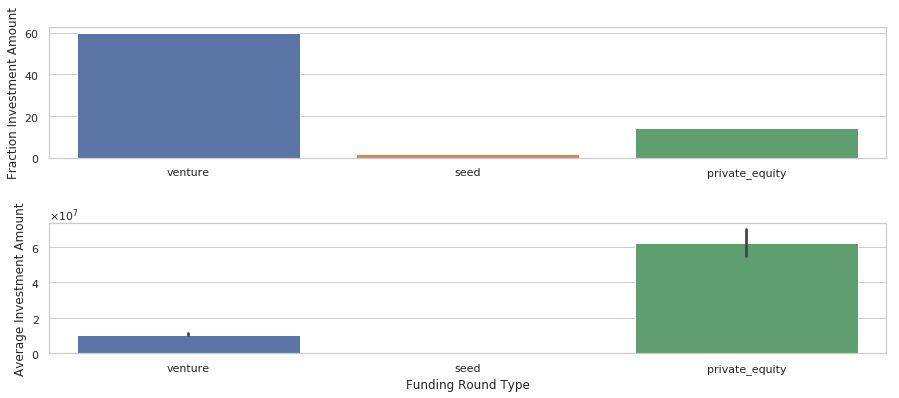

In [14]:
''' 1. A plot showing the fraction of total investments (globally) in venture, seed, and private equity, and the 
       average amount of investment in each funding type. This chart should make it clear that a certain funding type 
       (FT) is best suited for Spark Funds '''

plt.figure(figsize = (15, 6))

# Fraction of total investments (globally) in venture, seed, and private equity
plt.subplot(2, 1, 1)

#plt.title('Fraction of Total Investment (Globally)')
plt.ticklabel_format(useMathText = True)
mf_fraction_df = pd.DataFrame(100*((master_frame.groupby('funding_round_type').raised_amount_usd.sum()
                              )/(master_frame.raised_amount_usd.sum()))
                             ).loc[['venture', 'seed', 'private_equity']]


sns.barplot(x = mf_fraction_df.index,
            y = 'raised_amount_usd',
            data = mf_fraction_df
           )
#plt.xlabel('Funding Round Type')
plt.xlabel('')
plt.ylabel('Fraction Investment Amount')


# Average amount of investment in each funding type
plt.subplot(2, 1, 2)

#plt.title('Average of Total Investment')
plt.ticklabel_format(useMathText = True)
sns.barplot(x = 'funding_round_type', 
            y = 'raised_amount_usd',
            data = merged_df[(merged_df.funding_round_type == 'venture') 
                             | (merged_df.funding_round_type == 'seed') 
                             | (merged_df.funding_round_type == 'private_equity')])
plt.xlabel('Funding Round Type')
plt.ylabel('Average Investment Amount')


plt.subplots_adjust(hspace = 0.5)
plt.show()

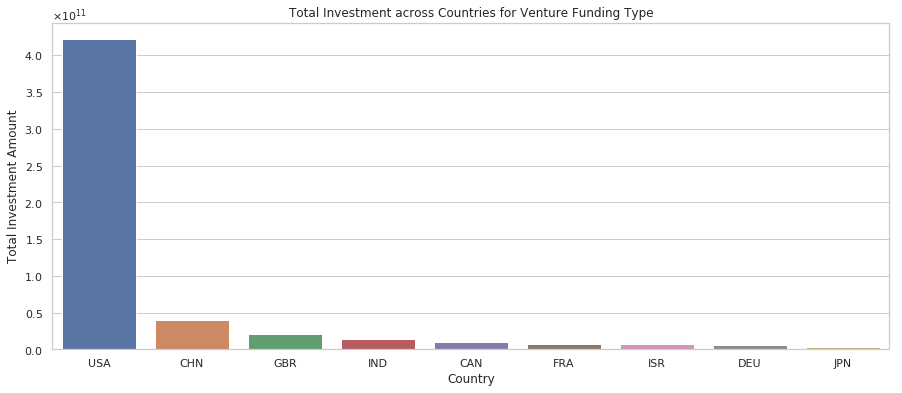

In [15]:
''' 2. A plot showing the top 9 countries against the total amount of investments of funding type FT. This should
       make the top 3 countries (Country 1, Country 2, and Country 3) very clear. '''

plt.figure(figsize = (15, 6))

plt.title('Total Investment across Countries for Venture Funding Type')
plt.ticklabel_format(useMathText = True)
sns.barplot(x = top9.index, y = 'raised_amount_usd', data = top9)
plt.xlabel('Country')
plt.ylabel('Total Investment Amount')

plt.show()

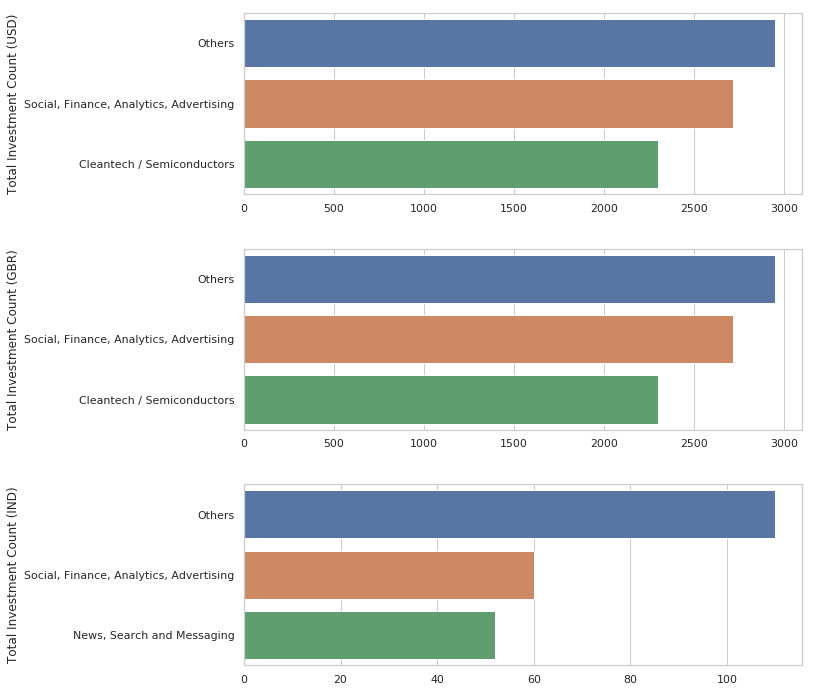

In [16]:
''' 2. A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the 
       chosen investment type FT). '''

plt.figure(figsize = (10, 12))

# Country USA from Dataframe D1
plt.subplot(3, 1, 1)

#plt.title('Total Count of Investments in top 3 sectors for country USA')
sns.barplot(x = D1_calc.main_sector[0:3], y = D1_calc.index[0:3])
#plt.xlabel('Main Sectors')
plt.xlabel('')
plt.ylabel('Total Investment Count (USD)')


# Country GBR from Dataframe D2
plt.subplot(3, 1, 2)

#plt.title('Total Count of Investments in top 3 sectors for country GBR')
sns.barplot(x = D1_calc.main_sector[0:3], y = D2_calc.index[0:3])
plt.xlabel('Main Sectors')
plt.xlabel('')
plt.ylabel('Total Investment Count (GBR)')


# Country IND from Dataframe D3
plt.subplot(3, 1, 3)

#plt.title('Total Count of Investments in top 3 sectors for country IND')
sns.barplot(x = D3_calc.main_sector[0:3], y = D3_calc.index[0:3])
plt.xlabel('Main Sectors')
plt.xlabel('')
plt.ylabel('Total Investment Count (IND)')

plt.subplots_adjust(hspace = 0.3)
plt.show()